# Multiple Linear Regression Model

This project uses Kaggle House Price Dataset **(From MachineHack)**.

### Objectives
- Import necessary libraries.
- Read, view, and clean the dataset using pandas and numpy.
- Use Exploratory Data Analysis (EDA) to understand which model to use:
  - Create scatter plots for each feature against the target variable.
  - Calculate the correlation matrix and plot correlations between features and the target using matplotlib.
- Split and standardize the dataset.
- Train two models of multiple linear regression, one with 4 features and one with all features.
- Compare the results of the two models.
- Implement polynomial regression using scikit-learn to assess performance on non-linear models.
- Compare the performance of polynomial regression with our multiple linear regression model.
- Compare our trained multiple linear regression model with the scikit-learn multiple linear regression model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the house price data from the file
data = pd.read_csv("house_price_dataset.csv")
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [3]:
# Check for any missing values
data.isna().any()

POSTED_BY                False
UNDER_CONSTRUCTION       False
RERA                     False
BHK_NO.                  False
BHK_OR_RK                False
SQUARE_FT                False
READY_TO_MOVE            False
RESALE                   False
ADDRESS                  False
LONGITUDE                False
LATITUDE                 False
TARGET(PRICE_IN_LACS)    False
dtype: bool

In [4]:
# Drop unnecessary columns
data.drop(["POSTED_BY", "ADDRESS"], axis=1, inplace=True)

# Applying the condition to change column values
data["BHK_OR_RK"] = np.where(data["BHK_OR_RK"] == "BHK", 1, 0)

# Rename specific columns
data.rename(columns={"BHK_NO.": "NO. OF ROOMS", "BHK_OR_RK": "BHK(1)_OR_RK(0)", "TARGET(PRICE_IN_LACS)": "PRICE_IN_LACS"}, inplace=True)

data

,UNDER_CONSTRUCTION,RERA,NO. OF ROOMS,BHK(1)_OR_RK(0),SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE_IN_LACS
0,0,0,2,1,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,1,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,1,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,1,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,1,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,1,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,1,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,1,927.079009,1,1,12.900150,80.227910,67.0


Given that the dataset is known to be used for a multiple linear regression model, we can simply build such a model. However, if the dataset was scraped from different sources, how would a person know if the dataset, having multiple features, is suitable for linear regression or non-linear regression? That is why we will assume this to be unknown and use techniques like **Exploratory Data Analysis (EDA)** and **Model Fitting and Comparison** to better determine which model to use.

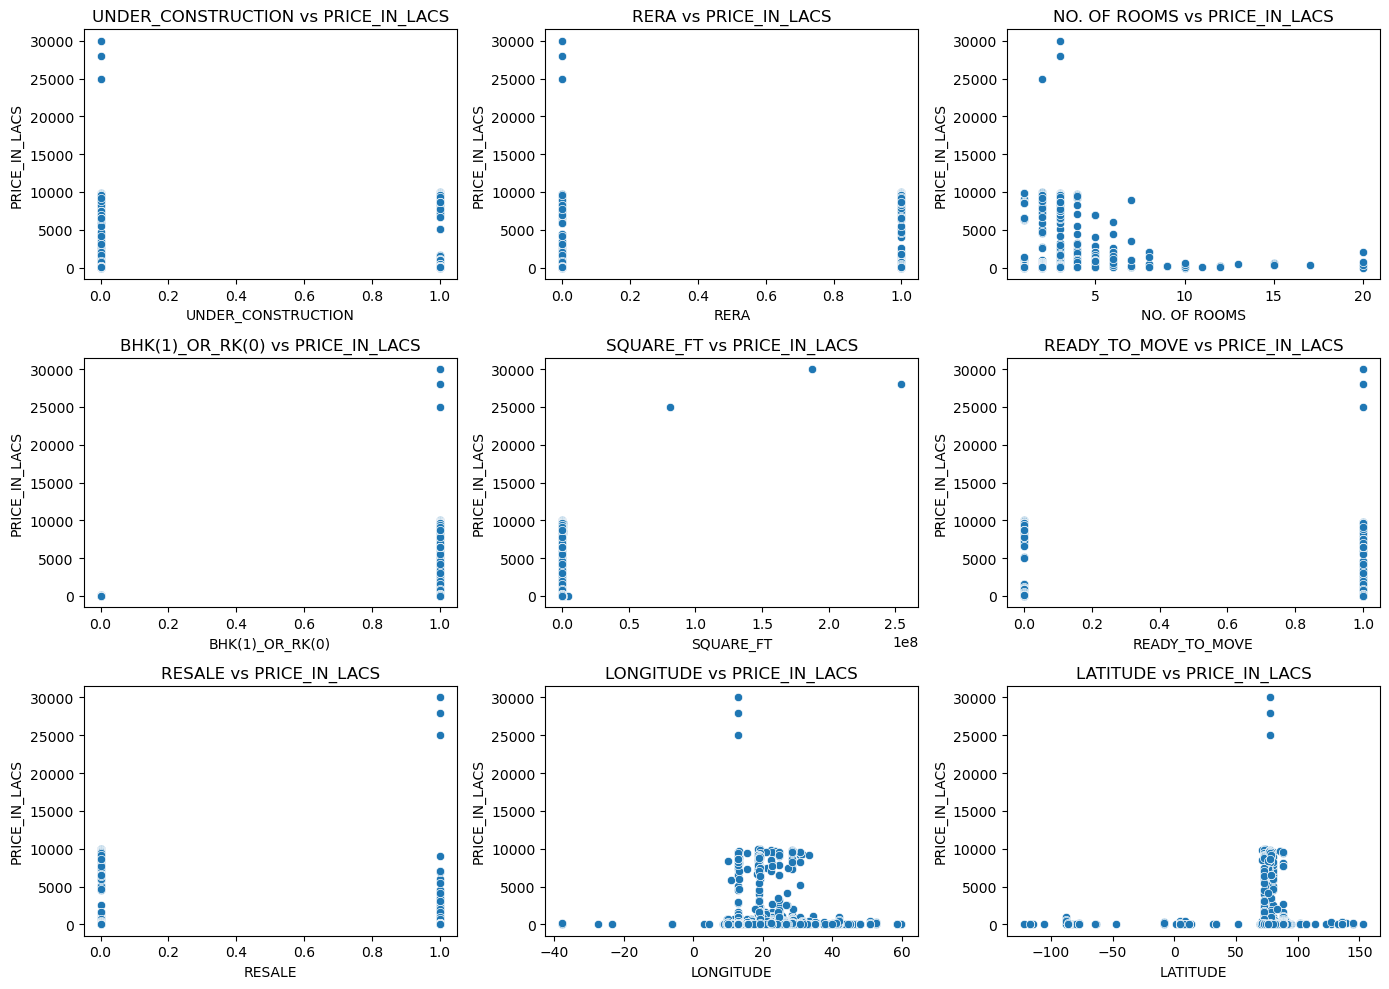

In [5]:
# Create a scatter plot for each feature against the target
_, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(data.columns[:-1]):
    sns.scatterplot(data=data, x=feature, y=data.columns[-1], ax=axes[i])
    axes[i].set_title(f"{feature} vs {data.columns[-1]}")
    
    plt.tight_layout()

Looking at the scatter plots for each feature variable against the target variable, it is difficult to identify any linear relationships. Next, we will examine the linear correlations between the features and the target variable using a correlation matrix.

In [6]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Extract correlation with target variable
correlation_with_target = correlation_matrix[data.columns[-1]].drop(data.columns[-1])

correlation_with_target

UNDER_CONSTRUCTION    0.055399
RERA                  0.067636
NO. OF ROOMS          0.112283
BHK(1)_OR_RK(0)       0.004429
SQUARE_FT             0.402685
READY_TO_MOVE        -0.055399
RESALE               -0.207378
LONGITUDE            -0.031112
LATITUDE             -0.017254
Name: PRICE_IN_LACS, dtype: float64

Text(0, 0.5, 'Correlation with Target')

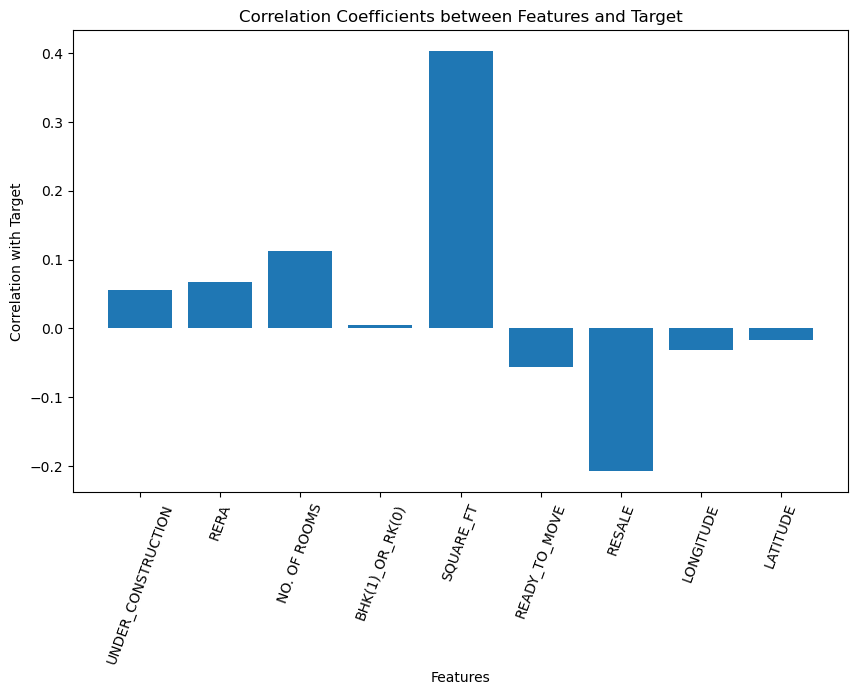

In [7]:
# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(correlation_with_target.index, correlation_with_target.values)
plt.title("Correlation Coefficients between Features and Target")
plt.xlabel("Features")
plt.xticks(rotation=70)
plt.ylabel("Correlation with Target")

The **SQUARE_FT** feature stands out as the most influential factor, positively affecting the target variable, indicating that larger properties tend to have higher values. **NO. OF ROOMS** also contributes positively, but to a lesser extent. Conversely, **RESALE** properties tend to decrease the value of the target variable, highlighting a preference for new properties over resale ones. Other features, like compliance with **RERA**, **UNDER_CONSTRUCTION** & **READY_TO_MOVE** status, and geographical coordinates, have relatively minor influences on the target variable. 

Based on the correlation coefficients between the features and the target variable, and our goal of building a multiple linear regression model, we'll select four features: **UNDER_CONSTRUCTION**, **RERA**, **NO. OF ROOMS**, and **SQUARE_FT**. These have a positive impact on the target variable, while features with negative or negligible linear impacts will be ignored. We'll then use all the features and compare results of both models. Additionally, we'll apply polynomial regression using scikit-learn to assess if the results improve. Finally, we'll compare our model to scikit-learn model.

In [8]:
# Split the dataset into training and testing and standardize the data for efficient model performance.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[data.columns[:-1]].to_numpy()
y = data[data.columns[-1]].to_numpy()

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

X_train shape: (23560, 9)
X_test shape: (5891, 9)
y_train shape: (23560,)
y_test shape: (5891,)


(array([[ 2.13646391, -0.6829721 , -0.44419803, ...,  0.27816062,
          0.19263178,  1.08828088],
        [-0.46806314, -0.6829721 ,  0.68425846, ...,  0.27816062,
          0.98112741,  0.58080349],
        [ 2.13646391,  1.46418865,  4.06962793, ...,  0.27816062,
          0.54624308,  0.15031061],
        ...,
        [ 2.13646391,  1.46418865, -0.44419803, ...,  0.27816062,
         -0.51180519, -0.19889598],
        [-0.46806314, -0.6829721 ,  0.68425846, ...,  0.27816062,
         -0.06844214,  0.42208648],
        [ 2.13646391, -0.6829721 , -0.44419803, ...,  0.27816062,
         -1.32095082,  0.07478108]]),
 array([[-0.46806314, -0.6829721 ,  0.68425846, ...,  0.27816062,
          0.19207118,  1.09818927],
        [-0.46806314, -0.6829721 ,  0.68425846, ...,  0.27816062,
          1.15073522,  0.02520355],
        [-0.46806314, -0.6829721 , -0.44419803, ...,  0.27816062,
          1.17961565,  0.05022747],
        ...,
        [-0.46806314, -0.6829721 , -0.44419803, ...,  

The multiple linear regression model can be represented by the following equation:

$$
\begin{equation}
\hat{\mathbf{y}} = f(\mathbf{X}) = \mathbf{X} \cdot \mathbf{w} + b
\end{equation}
$$

where:
- $\hat{\mathbf{y}}$ represents the vector of predicted variables (dependent variables) for all training examples,
- $\mathbf{X}$ represents the matrix of input features (independent variables),
- $\mathbf{w}$ represents the vector of weights (coefficients) for the linear relationship,
- $b$ represents the $y$-intercept (bias term).

Our goal is to find the optimal values of $\mathbf{w}$ and $b$ that minimize the Mean Absolute Error (MAE) cost function. The MAE is defined as:

$$
\begin{equation}
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} |y_i - \hat{y_i} \tag{2}|
\end{equation}
$$

where:
- $m$ is the number of data points,
- $y_i$ is the actual target value for the $i$-th data point,
- $\hat{y_i}$ is the predicted value for the $i$-th data point.

To update our parameters, we will use the gradient descent optimization algorithm:

$$
\begin{equation}
w_{j, \text{new}} = w_{j, \text{old}} - \alpha \times \frac{\partial \text{MAE}}{\partial w_j} \tag{3}
\end{equation}
$$

$$
\begin{equation}
b_{\text{new}} = b_{\text{old}} - \alpha \times \frac{\partial \text{MAE}}{\partial b} \tag{4}
\end{equation}
$$

where:
- $j = 1, 2, 3, \ldots, n$
- $w_{j, \text{new}}$ and $w_{j, \text{old}}$ are the updated and current weights for the $j$-th feature, respectively,
- $b_{\text{new}}$ and $b_{\text{old}}$ are the updated and current $y$-intercepts, respectively,
- $\alpha$ is the learning rate,
- $\frac{\partial \text{MAE}}{\partial w_j}$ is the gradient of the Mean Absolute Error (MAE) with respect to the $j$-th weight,
- $\frac{\partial \text{MAE}}{\partial b}$ is the gradient of the MAE with respect to the $y$-intercept.

and,

$$
\begin{equation}
\frac{\partial \text{MAE}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    -x^j_i & \text{if } (y_i - \hat{y_i}) \geq 0 \\
    x^j_i & \text{if } (y_i - \hat{y_i})  < 0
\end{cases} \tag{5}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial \text{MAE}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    -1 & \text{if } (y_i - \hat{y_i}) \geq 0 \\
    1 & \text{if } (y_i - \hat{y_i})  < 0
\end{cases} \tag{6}
\end{equation}
$$

In [9]:
def train_multiple_lr_model(X, y, w, b, alpha, iterations):

    learning_curve_data = []

    for i in range(iterations):
        y_hat = np.dot(X, w) + b
        cost = np.sum(np.abs(y - y_hat)) / len(y)
    
        print(f"Iteration = {i+1}, w = {w}, b = {b}, cost = {cost}")

        if ((i+1) % 100) == 0:
            learning_curve_data.append([i+1, cost])

        if (i+1) != iterations:
            for j in range(len(w)):
                w[j] = w[j] - alpha * (np.sum(np.where((y - y_hat >= 0), -X[:, j], X[:, j])) / len(y))
            
            b = b - alpha * (np.sum(np.where((y - y_hat >= 0), -1, 1)) / len(y))

    return w, b, np.array(learning_curve_data)

In [10]:
# Train multiple linear regression model with 4 selected features
w, b, lcd = train_multiple_lr_model(X_train_scaled[:, [0, 1, 2, 4]], y_train, np.random.rand(4), 0, 15, 3000)

print(f"\nOptimal (w's) = {w}, Optimal (b) = {b}")

Iteration = 1, w = [0.62687083 0.43652692 0.89569444 0.18556926], b = 0, cost = 143.4569015026088
Iteration = 2, w = [0.62534239 0.43913589 0.86003153 0.18556452], b = 14.996179966044142, cost = 128.56418815856154
Iteration = 3, w = [0.60521446 0.55460905 1.39139282 0.18905659], b = 29.51485568760611, cost = 116.0143297279435
Iteration = 4, w = [0.75772772 1.33264714 4.47548655 0.21948154], b = 40.22113752122241, cost = 108.83745263443656
Iteration = 5, w = [1.00870778 2.50786705 8.17598859 0.27362808], b = 47.443548387096776, cost = 104.97001254148617
Iteration = 6, w = [ 1.02660146  3.40144049 11.65378384  0.34489511], b = 52.18803056027165, cost = 102.89953281662233
Iteration = 7, w = [ 0.98408235  4.1017127  14.62295238  0.4253641 ], b = 55.53820033955858, cost = 101.70451784394595
Iteration = 8, w = [ 0.98334445  4.7160045  17.0617052   0.51305701], b = 57.82130730050934, cost = 101.02134120365868
Iteration = 9, w = [ 0.99311563  5.20090535 18.96055746  0.60522027], b = 59.4371816

In [11]:
# Train multiple linear regression model with all features
w_, b_, lcd_ = train_multiple_lr_model(X_train_scaled, y_train, np.random.rand(9), 0, 15, 3000)

print(f"\nOptimal (w's) = {w_}, Optimal (b) = {b_}")

Iteration = 1, w = [0.51914853 0.38260354 0.93058889 0.07405525 0.78926267 0.1237673
 0.78714669 0.96270874 0.58954439], b = 0, cost = 143.45691162294307
Iteration = 2, w = [0.52153256 0.3833481  0.89261776 0.07391441 0.78926635 0.12138327
 0.78572991 0.96533928 0.58920998], b = 14.99490662139219, cost = 128.57706424384455
Iteration = 3, w = [0.55840946 0.51720315 1.46672054 0.10528222 0.7930888  0.08450637
 0.73631519 0.69909357 0.6051618 ], b = 29.46264855687606, cost = 116.11893007529224
Iteration = 4, w = [ 0.79181565  1.3896829   4.50886931  0.21592629  0.82377041 -0.14889982
  0.47827583 -0.74526656  0.24700851], b = 40.130730050933785, cost = 108.78655560206701
Iteration = 5, w = [ 0.97594734  2.53532838  8.2902357   0.23171582  0.87782946 -0.33303151
  0.32146905 -2.38115084 -0.38749146], b = 47.368421052631575, cost = 104.64195235170594
Iteration = 6, w = [ 0.96222373  3.56761926 11.9142883   0.18180432  0.9483607  -0.3193079
  0.27311608 -3.78513691 -1.18656513], b = 52.23005

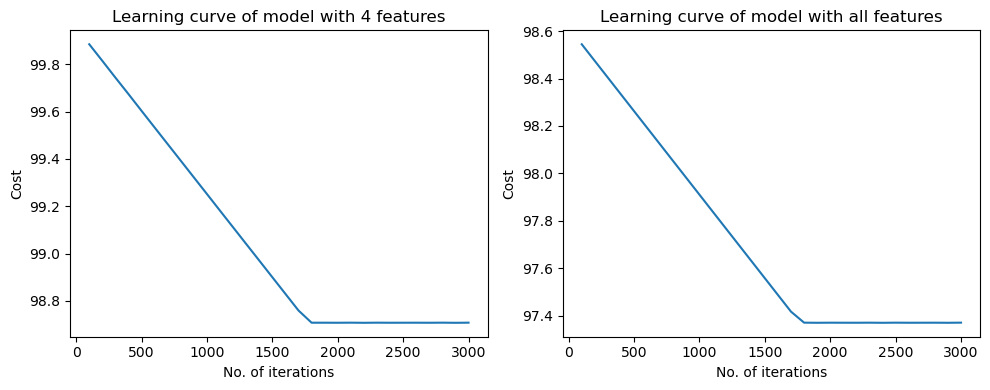

In [12]:
# Visualize the learning curve data for both models
_, axes = plt.subplots(1, 2, figsize=(10, 4))


def learning_curve_data(lcd, i, title):
    axes[i].plot(lcd[:, 0], lcd[:, 1])
    axes[i].set_title(title)
    axes[i].set_xlabel("No. of iterations")
    axes[i].set_ylabel("Cost")
        
    plt.tight_layout()


learning_curve_data(lcd, 0, "Learning curve of model with 4 features")
learning_curve_data(lcd_, 1, "Learning curve of model with all features")

In [13]:
# Check the trained parameters of both models on testing data and calculate the Mean Absolute Error metric
y_pred = np.dot(X_test_scaled[:, [0, 1, 2, 4]], w) + b
mae = np.sum(np.abs(y_test - y_pred)) / len(y_test)

y_pred_ = np.dot(X_test_scaled, w_) + b_
mae_ = np.sum(np.abs(y_test - y_pred_)) / len(y_test)

print("Results of the model with 4 features.\n")
print(f"Train MAE: {lcd[-1][1]}")
print(f"Test MAE: {mae}")
print(f"Coefficients: {w}")
print(f"Intercept: {b}")

print("\n---------------------------------------------------------------------------\n")

print("Results of the model with all features.\n")
print(f"Train MAE: {lcd_[-1][1]}")
print(f"Test MAE: {mae_}")
print(f"Coefficients: {w_}")
print(f"Intercept: {b_}")

Results of the model with 4 features.

Train MAE: 98.70745780686737
Test MAE: 92.16618860517347
Coefficients: [  0.35162713   6.98138416  26.63636513 181.82003231]
Intercept: 67.97113752122355

---------------------------------------------------------------------------

Results of the model with all features.

Train MAE: 97.37129417938147
Test MAE: 91.00351815082253
Coefficients: [ 5.90372761e-01  6.74075846e+00  2.80052436e+01 -7.08531890e-01
  1.81911880e+02  5.25430689e-02  2.13876870e-01 -9.69777628e+00
 -1.00473816e+01]
Intercept: 68.36460101867678


We trained two models, one with four features and the other with all features. Both models converged after approximately **1800** iterations, achieving a minimum cost of **98.708** for the model with four features and **97.371** for the model with all features. Upon evaluating our trained parameters on the testing data for both models, we observed that the results were better than those on the training data. Comparing the results of both models, it is evident that despite some features having negative correlation coefficients and one being non-linear, the model using all the features of the dataset achieved slightly better results on both the training and testing data compared to the model with only four features. Now, we move on to **Model Fitting and Comparison**. We will fit several non-linear models, such as polynomial regression using scikit-learn, and then compare the results with the model using all the features. This will help us determine which model is most suitable for this particular dataset.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

# Define the degrees of the polynomial features
degrees = [2, 3, 4]

# Loop over each degree, fit the model, and evaluate it
for degree in degrees:
    # Transform features into polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Standardize the data using StandardScaler()
    scaler_ = StandardScaler()
    X_train_poly_scaled = scaler_.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler_.transform(X_test_poly)
    
    # Fit a linear regression model on the transformed scaled features
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly_scaled)
    y_test_pred = model.predict(X_test_poly_scaled)
    
    # Evaluate the model
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"Degree: {degree}")
    print(f"Train R2: {train_r2}")
    print(f"Test R2: {test_r2}")
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print("------")

Degree: 2
Train R2: 0.8081501503225593
Test R2: -225.971449626613
Train MAE: 87.97982108150504
Test MAE: 233.32487897670484
------
Degree: 3
Train R2: 0.904856026513462
Test R2: -9.42150535739313e+17
Train MAE: 67.20026826485424
Test MAE: 11601814778.932796
------
Degree: 4
Train R2: 0.9387930489484283
Test R2: -1.4617288283333494e+17
Train MAE: 59.25435434429333
Test MAE: 6019058151.090641
------


The performance of polynomial regression models of degrees **2**, **3**, and **4** indicates severe overfitting. While the models fit the training data well, as shown by high R² scores (**0.808**, **0.905**, and **0.939**, respectively), they perform extremely poorly on the test data, with negative R² scores and exceptionally high mean absolute errors, particularly for degrees **3** and **4**. This suggests that increasing the polynomial degree leads to models that capture noise rather than underlying patterns, resulting in poor generalization to new data. Therefore, after evaluating the mean absolute error on the test data between our linear model and the above non-linear models, it is concluded that this dataset is better suited for a multiple linear regression model. Finally, we will compare our multiple linear regression model with scikit-learn model.

In [19]:
# Create and train the multiple linear regression model using scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print("Scikit-learn model results.\n")
print(f"Train R2: {train_r2_lr}")
print(f"Test R2: {test_r2_lr}")
print(f"Train MAE: {train_mae_lr}")
print(f"Test MAE: {test_mae_lr}")
print(f"Sk-learn Coefficients: {lr_model.coef_}")
print(f"Sk-learn Intercept: {lr_model.intercept_}")

print("\n-------------------------------------------------------\n")

print("Our model results.\n")
print(f"Train R2: {r2_score(y_train, np.dot(X_train_scaled, w_) + b_)}")
print(f"Test R2: {r2_score(y_test, y_pred_)}")
print(f"Train MAE: {lcd_[-1][1]}")
print(f"Test MAE: {mae_}")
print(f"Our model Coefficients: {w_}")
print(f"Our model Intercept: {b_}")

Scikit-learn model results.

Train R2: 0.1500048985512692
Test R2: 0.4014112157644959
Train MAE: 142.80702537787573
Test MAE: 133.58238708156384
Sk-learn Coefficients: [-1.11238820e+11  1.20104523e+01  7.67882423e+01  4.75208640e-01
  1.83607088e+02 -1.11238820e+11 -1.42554073e+02 -2.32431771e+01
 -1.47737217e+01]
Sk-learn Intercept: 143.45618747940983

-------------------------------------------------------

Our model results.

Train R2: 0.08086639589361344
Test R2: 0.3633036536363461
Train MAE: 97.37129417938147
Test MAE: 91.00351815082253
Our model Coefficients: [ 5.90372761e-01  6.74075846e+00  2.80052436e+01 -7.08531890e-01
  1.81911880e+02  5.25430689e-02  2.13876870e-01 -9.69777628e+00
 -1.00473816e+01]
Our model Intercept: 68.36460101867678


When we stack up our model against the scikit-learn one, there are some clear differences. The scikit-learn model seems to do better overall, with higher R² scores on both training and testing sets, showing it's better at catching the ups and downs in our target variable. However, our model wins out in accuracy, with lower mean absolute error values, meaning it's better at predicting the actual values. Looking at the coefficients, we see some interesting stuff—like how the scikit-learn model's numbers are bigger, but our model seems to emphasize different features. So, with our project of building a multiple linear regression model now completed, We can appreciate the insights both models offer and feel confident in the results we've achieved.